# Preambule

In [1]:
import javabridge
import bioformats as bf
javabridge.start_vm(class_path=bf.JARS)

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/Users/srdjan/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [2]:
from collections import OrderedDict

In [3]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

# %config InlineBackend.figure_format = 'retina'

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/Users/srdjan/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [5]:
# !conda install ipympl --yes

In [5]:
from scipy.stats import distributions as dst

In [6]:
# bf.ImageReader?

In [7]:
# from lesion.lifio import parse_xml_metadata
import numpy as np

In [8]:
from sys import path as syspath
from os.path import expanduser
syspath.append(expanduser("~/Seafile/functions/"))

In [9]:
from general_functions import autocorr, tally

## Parse metadata

In [10]:
filename = './data/Ca2uM_line_avg0017.nd2'

In [11]:
md = bf.get_omexml_metadata(filename)

xml = bf.OMEXML(md)
Nimages = xml.get_image_count()
mdf = []
for i in range(Nimages):
    im = xml.image(index=i)
    tmp = OrderedDict([(attrib,getattr(im,attrib)) for attrib in ["Name","AcquisitionDate"]])
    for dim in "XYTCZ":
        tmp[dim] = getattr(im.Pixels, "Size"+dim)
    mdf += [tmp]

mdf = pd.DataFrame(mdf)

In [12]:
mdf["AcquisitionDate"] = pd.to_datetime(mdf["AcquisitionDate"])

In [13]:
mdf["Total Pixels"] = mdf["X"]*mdf["Y"]*mdf["T"]

In [14]:
mdf#.sort_values("Total Pixels")

,Name,AcquisitionDate,X,Y,T,C,Z,Total Pixels
0,Ca2uM_line_avg0017.nd2 (series 1),NaT,512,512,3063,1,1,802947072


In [15]:
rdr = bf.ImageReader(filename, perform_init=True)

# Bar Plots

In [16]:
# nr,nc = 1,2
# fig,axs = plt.subplots(nr,nc,figsize=(nc*5,nr*4), sharex=True, sharey=False)
# for ia,idx in enumerate([0]):
#     try:
#         ax = axs.flat[ia]
#     except:
#         break

#     dimensions = mdf.loc[idx,list("XYZCT")]

#     image = np.array([
#         rdr.read(series=idx, rescale=False,t=t) for t in range(dimensions["T"])
#     ])[1]
#     tmp = np.random.choice(image.flatten(),10000)
#     x,y = np.array(tally(tmp)).T
#     ax.bar(x,y/y.sum())
#     ax.text(1,.9,r"$%i{\times}%i{\times}%i$  "%tuple(dimensions[list("XYT")]), 
#             ha="right",va="top",transform=ax.transAxes)
#     ax.text(1,.8,mdf.loc[idx,"Name"]+"  ", 
#             ha="right",va="top",transform=ax.transAxes)
# #     ax.text(1,.7,("S=%.1f"%entropy(image.flatten()))+"  ", 
# #             ha="right",va="top",transform=ax.transAxes)
#     ax.set_yticklabels([])
# #     break
# #     ax.set_xlim(-2,np.percentile(tmp,90))
# fig.tight_layout()

In [17]:
# plt.plot(sorted(tmp), np.arange(len(tmp)),".-")
# plt.xscale("symlog")

In [18]:
# plt.bar(x,y)
# plt.yscale("symlog")

# Check individual image

In [19]:
idx = 0
dimensions = mdf.loc[idx,list("XYZCT")]

image = np.array([
    rdr.read(series=idx, rescale=False,t=t) for t in range(dimensions["T"])
])

In [20]:
# image = np.vstack([
#     rdr.read(series=idx, rescale=False,t=t) for t in range(dimensions["T"])
# ]).T

In [21]:
image.shape

(3063, 512, 512, 3)

In [22]:
dimensions

X     512
Y     512
Z       1
C       1
T    3063
Name: 0, dtype: object

In [23]:
np.all(image.T[0]==0)

True

In [24]:
np.all(image.T[1]==0)

False

In [25]:
np.all(image.T[2]==0)

True

In [26]:
image = image[:,:,:,1]

In [27]:
image.shape

(3063, 512, 512)

In [28]:
im = np.mean(image, axis=0)
imax = np.array(np.where(im==im.max())).T

In [29]:
# fig = plt.figure(figsize=(13,2))
# plt.imshow(im)
# plt.colorbar()
# for x,y in imax:
#     plt.plot(y,x,"s", mfc="none",color="C1")


In [30]:
image.shape

(3063, 512, 512)

In [31]:
stacked = np.vstack(image)

In [32]:
stacked.shape

(1568256, 512)

In [33]:
from general_functions import moving_average

In [34]:
iline = 347

In [35]:
# plt.figure(figsize=(10,3))
# plt.plot(stacked[:10**5,iline])

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 21 µs


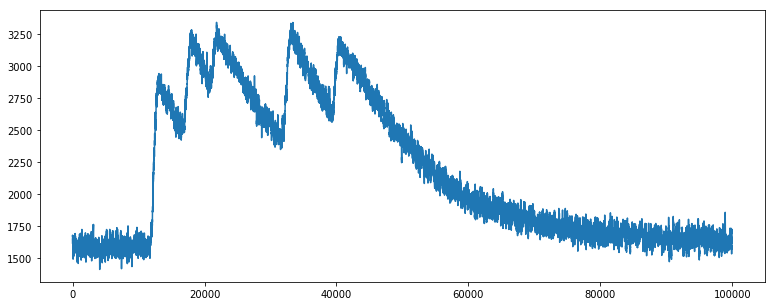

In [36]:
%time
plt.figure(figsize=(13,5))
dd = 10
plt.plot(moving_average(np.mean(stacked[int(.5e5):int(1.5e5),iline-dd:iline+dd], axis=1),50))

In [75]:
x,y = imax[0]
dd = 20
interesting = np.sum(image[:-1,x-dd//2:x+dd//2,y-dd//2:y+dd//2], axis=(1,2))

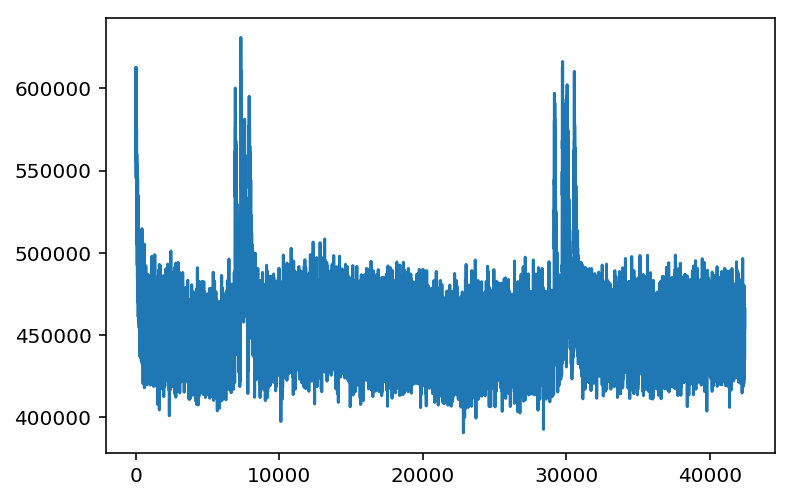

In [77]:
plt.plot(interesting)

In [52]:
from general_functions import moving_average

In [78]:
avg = moving_average(interesting,20)

In [102]:
rest = interesting[10:-9]-avg

/Users/srdjan/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


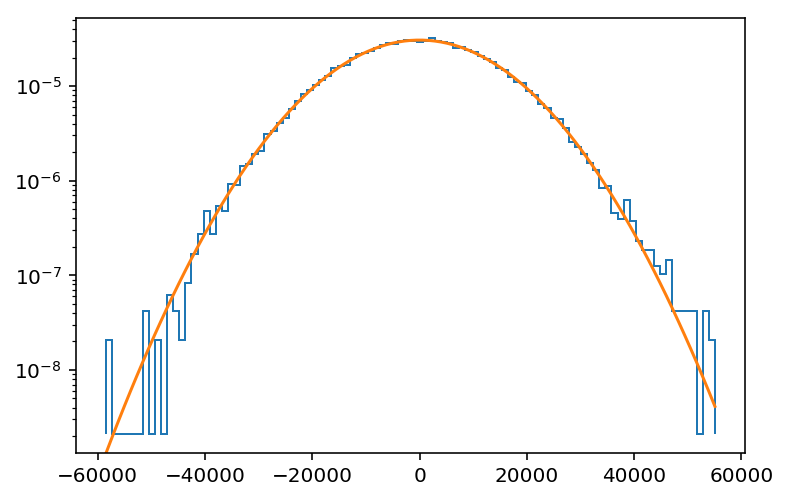

In [103]:
y,x,_ = plt.hist(rest,100,log=True, histtype="step", normed=True)
plt.plot(x,dst.norm.pdf(x,scale=rest.std()))
# plt.errorbar(x,y,y*len(rest)**.5, ls="none",marker=".")

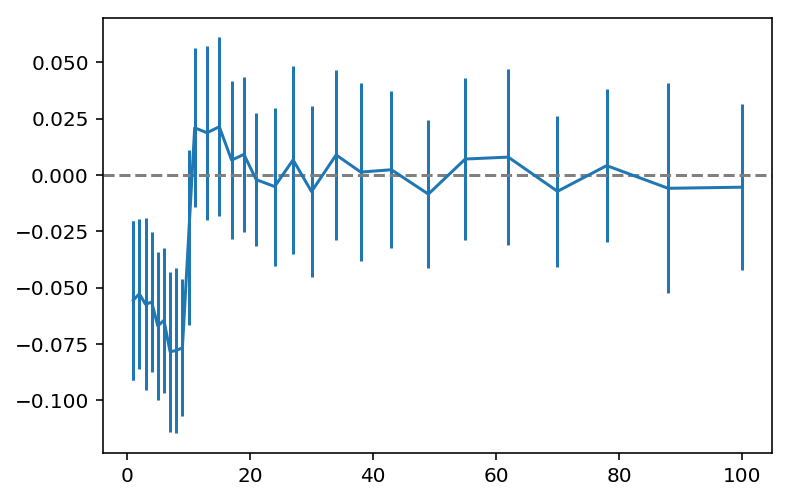

In [104]:
xr = np.hstack([[1],np.unique(np.logspace(0,2,40).astype(int))])
yr, ye = autocorr(rest,xr, nsplits=50)

plt.errorbar(xr,yr,ye)
plt.axhline(0,ls="--", color="grey")

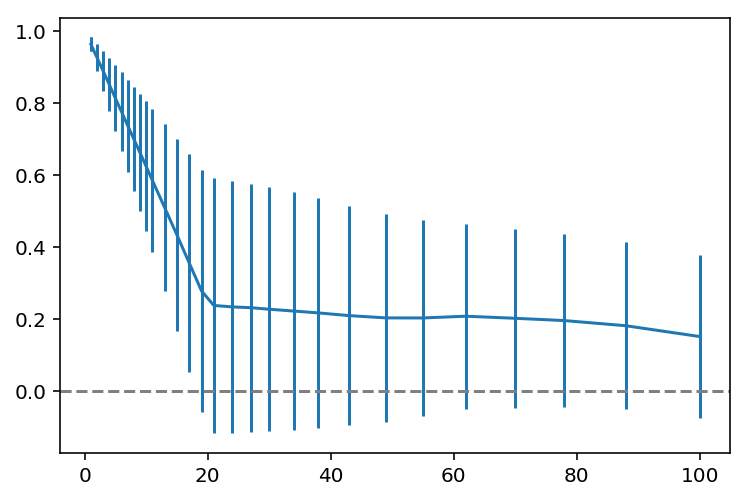

In [105]:
xr = np.hstack([[1],np.unique(np.logspace(0,2,40).astype(int))])
yr, ye = autocorr(avg,xr, nsplits=30)

plt.errorbar(xr,yr,ye)
plt.axhline(0,ls="--", color="grey")

(0, 75)

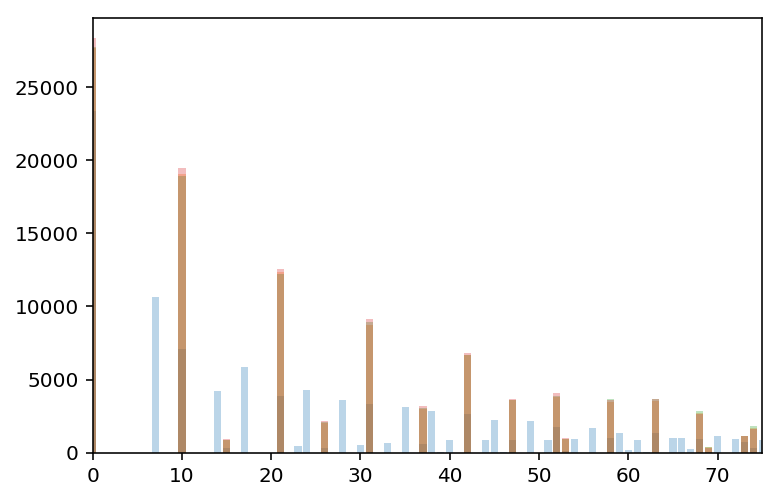

In [72]:
for im in image[:,:4]:
    x,y = np.array(tally(im.flatten())).T
    plt.bar(x,y, alpha = .3)
plt.xlim(0,75)

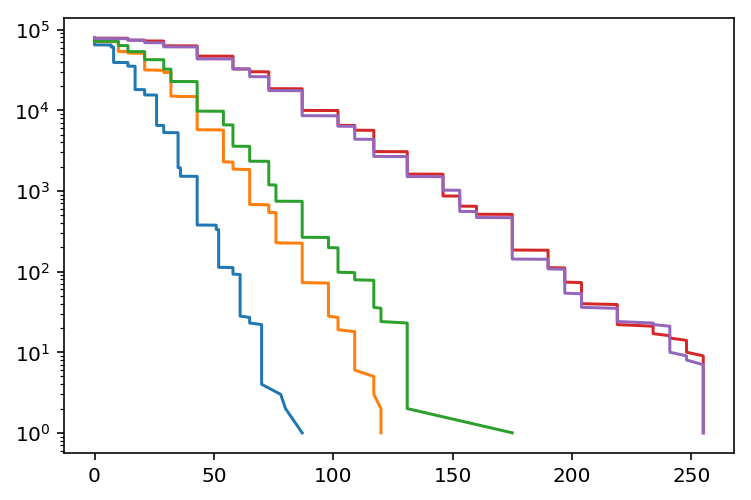

In [55]:

for iPx in [0,10,30,100,150]:
    plt.plot(sorted(image[iPx]), np.arange(1,1+image.shape[1])[::-1])
plt.yscale("log")

In [ ]:
xr = np.arange(1,10)

In [31]:
ACorr = np.array([autocorr(image[iPx],xr,nsplits=20) for iPx in range(len(image))])

In [32]:
ACorr.shape

(512, 2, 9)

In [33]:
ACorr = np.transpose(ACorr,axes=(2,0,1))

In [34]:
ACorr.shape

(9, 512, 2)

<ErrorbarContainer object of 3 artists>

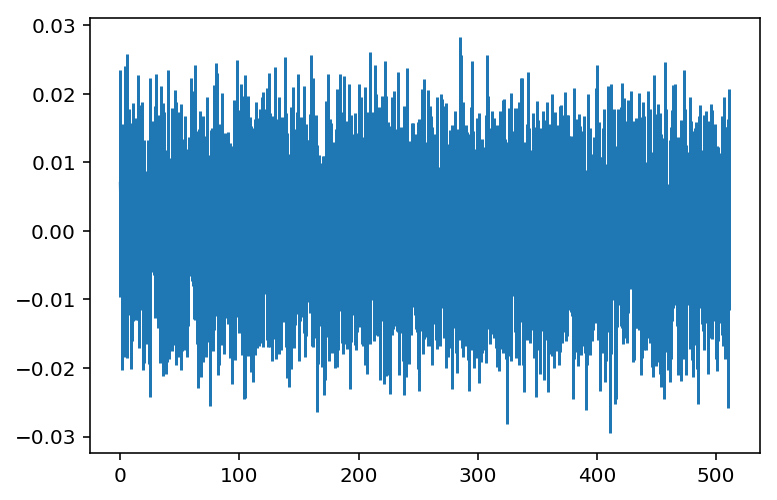

In [36]:
plt.errorbar(range(len(image)),*ACorr[0].T)

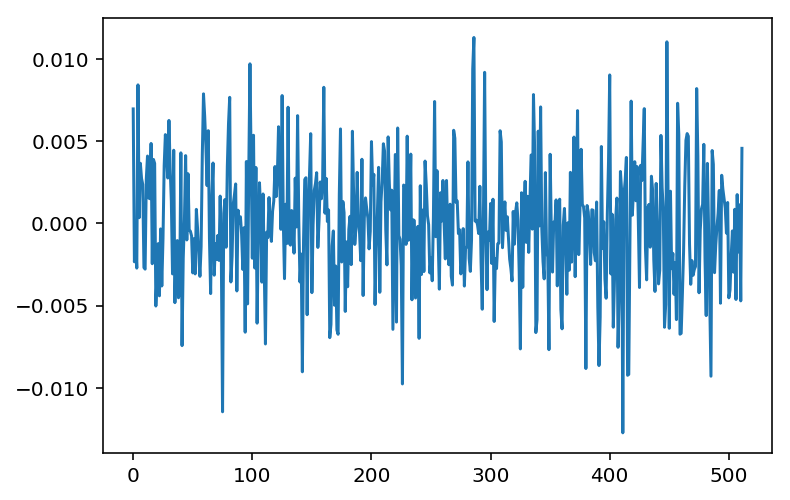

In [39]:
plt.plot(ACorr[0].T[0])

In [41]:
zscores = np.abs(ACorr[0].T[0])/ACorr[0].T[1]

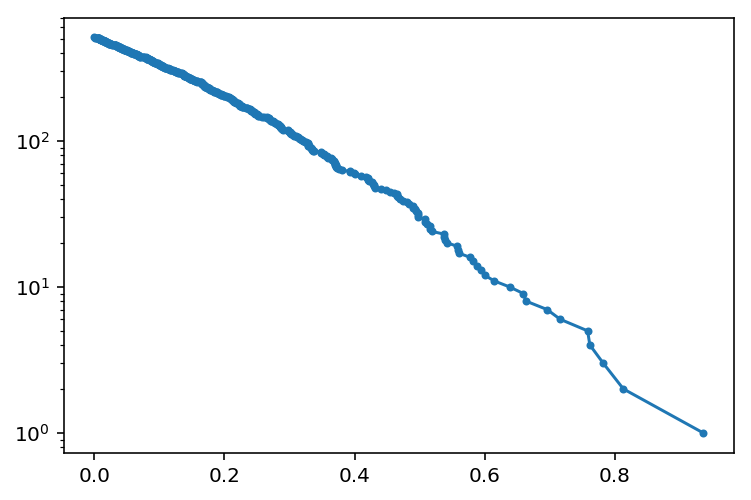

In [44]:
plt.plot(sorted(zscores), np.arange(1,1+len(image))[::-1],".-")
plt.yscale("log")

In [45]:
orderedPxs = np.argsort(zscores)[::-1]

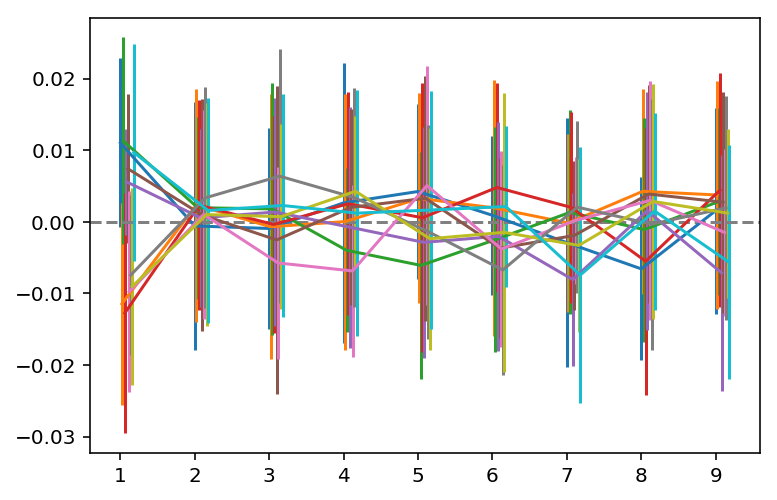

In [49]:
xr = np.arange(1,10)
ii=0
for iPx in orderedPxs[:10]:
    y, yerr = autocorr(image[iPx],xr,nsplits=20)
    plt.errorbar(xr+ii*.02,y,yerr)
    ii += 1
plt.axhline(0,ls="--", color="grey")

In [ ]:
 image

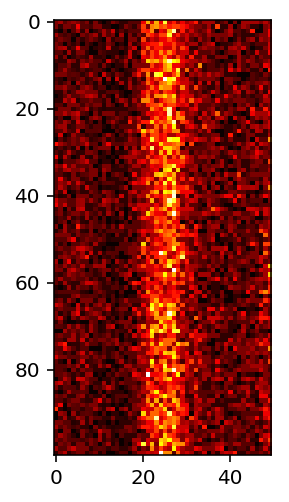

In [47]:
plt.imshow(image[0][:100,50:100],cmap=plt.cm.hot)

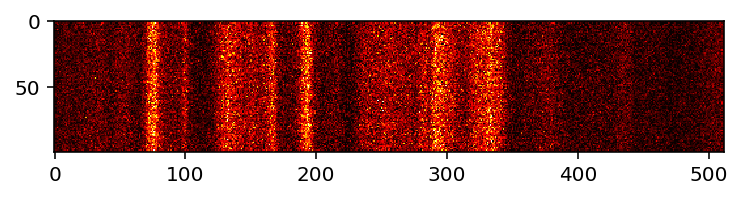

In [49]:
plt.imshow(image[0][-100:,:],cmap=plt.cm.hot)

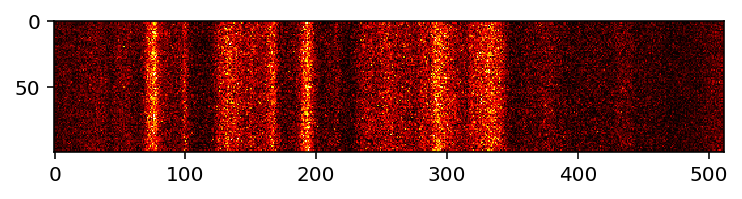

In [51]:
plt.imshow(image[1][:100,:],cmap=plt.cm.hot)

In [107]:
javabridge.kill_vm()